In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/zomato.csv',encoding='latin-1')

In [ ]:
df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
423,17145077,Star Noodle,216,Rest of Hawaii,"286 Kupuohi St, Lahaina, HI 96761",Lahaina,"Lahaina, Rest of Hawaii",-156.674835,20.885226,Asian,...,Dollar($),No,No,No,No,1,4.6,Dark Green,Excellent,723
6227,18208914,Sir John Bakery Cafe,1,New Delhi,"Shop 19, DDA Central Market, Near Balco Apartm...",Patparganj,"Patparganj, New Delhi",77.306191,28.631137,"Bakery, Desserts, Fast Food",...,Indian Rupees(Rs.),No,Yes,No,No,2,3.4,Orange,Average,27
4743,2297,Chankya,1,New Delhi,"C-6/1, Mandir Marg, Krishna Nagar, New Delhi",Krishna Nagar,"Krishna Nagar, New Delhi",77.281505,28.659351,"North Indian, Fast Food, South Indian",...,Indian Rupees(Rs.),No,No,No,No,2,3.2,Orange,Average,79
7999,18265698,Hangchuaa's Chinese Food Corner,1,New Delhi,"K-130, Gautam Nagar, Yusuf Sarai, New Delhi",Yusuf Sarai,"Yusuf Sarai, New Delhi",77.209808,28.560968,Chinese,...,Indian Rupees(Rs.),No,No,No,No,2,2.7,Orange,Average,5
2715,312338,De Bone Chicken,1,New Delhi,"20, J Block, Murga Market, Near Water Tank, As...",Ashok Vihar Phase 1,"Ashok Vihar Phase 1, New Delhi",77.173069,28.687254,"Raw Meats, Fast Food",...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0


In [ ]:
df.shape

(9551, 21)

In [ ]:
[feature for feature in df.columns if df[feature].isnull().sum()>0]

['Cuisines']

In [ ]:
df.isna().any()

Restaurant ID           False
Restaurant Name         False
Country Code            False
City                    False
Address                 False
Locality                False
Locality Verbose        False
Longitude               False
Latitude                False
Cuisines                 True
Average Cost for two    False
Currency                False
Has Table booking       False
Has Online delivery     False
Is delivering now       False
Switch to order menu    False
Price range             False
Aggregate rating        False
Rating color            False
Rating text             False
Votes                   False
dtype: bool

In [ ]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu 

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [ ]:
df.corr()

<ipython-input-33-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Restaurant ID,1.000000,0.146270,-0.224362,-0.052626,-0.001629,-0.134528,-0.327160,-0.147434
Country Code,0.146270,1.000000,-0.694629,0.018049,0.043717,0.245363,0.281295,0.154361
Longitude,-0.224362,-0.694629,1.000000,0.045415,0.045948,-0.080257,-0.114733,-0.084371
Latitude,-0.052626,0.018049,0.045415,1.000000,-0.111080,-0.166735,0.000197,-0.022914
Average Cost for two,-0.001629,0.043717,0.045948,-0.111080,1.000000,0.075111,0.051864,0.067833
Price range,-0.134528,0.245363,-0.080257,-0.166735,0.075111,1.000000,0.438356,0.309474
Aggregate rating,-0.327160,0.281295,-0.114733,0.000197,0.051864,0.438356,1.000000,0.313474
Votes,-0.147434,0.154361,-0.084371,-0.022914,0.067833,0.309474,0.313474,1.000000


In [ ]:
df2=pd.read_excel('/content/Country-Code.xlsx')

In [ ]:
df2.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [ ]:
final=pd.merge(df,df2,on='Country Code',how='left')

In [ ]:
country_name=final['Country'].value_counts().index

In [ ]:
country_count=final['Country'].value_counts().values

([<matplotlib.patches.Wedge at 0x7e424fb17f40>,
 [Text(-1.083531565863807, 0.189629496061996, 'India'),
  Text(1.0779194567879458, -0.21929351262173782, 'United States'),
  Text(1.0995857034695016, -0.03018742661244155, 'United Kingdom')],
 [Text(-0.5910172177438947, 0.10343427057927053, '94.49%'),
  Text(0.5879560673388794, -0.1196146432482206, '4.64%'),
  Text(0.5997740200742735, -0.016465869061331753, '0.87%')])

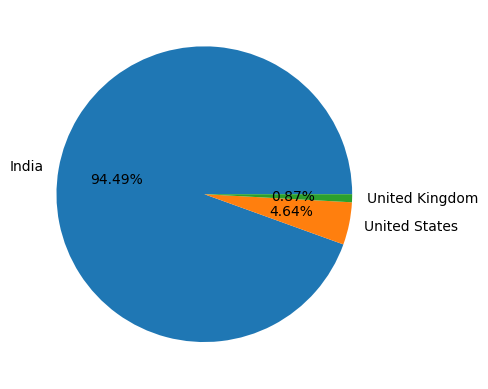

In [ ]:
plt.pie(country_count[:3],labels=country_name[:3],autopct='%0.2f%%')

#*Observation:1)Top three contries are INDIA>US>UK*

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
rating=final.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
rating.sample(10)

,Aggregate rating,Rating color,Rating text,Rating Count
26,4.3,Green,Very Good,174
18,3.5,Yellow,Good,480
3,2.0,Red,Poor,7
24,4.1,Green,Very Good,274
12,2.9,Orange,Average,381
17,3.4,Orange,Average,495
8,2.5,Orange,Average,110
20,3.7,Yellow,Good,427
28,4.5,Dark Green,Excellent,95
21,3.8,Yellow,Good,399


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

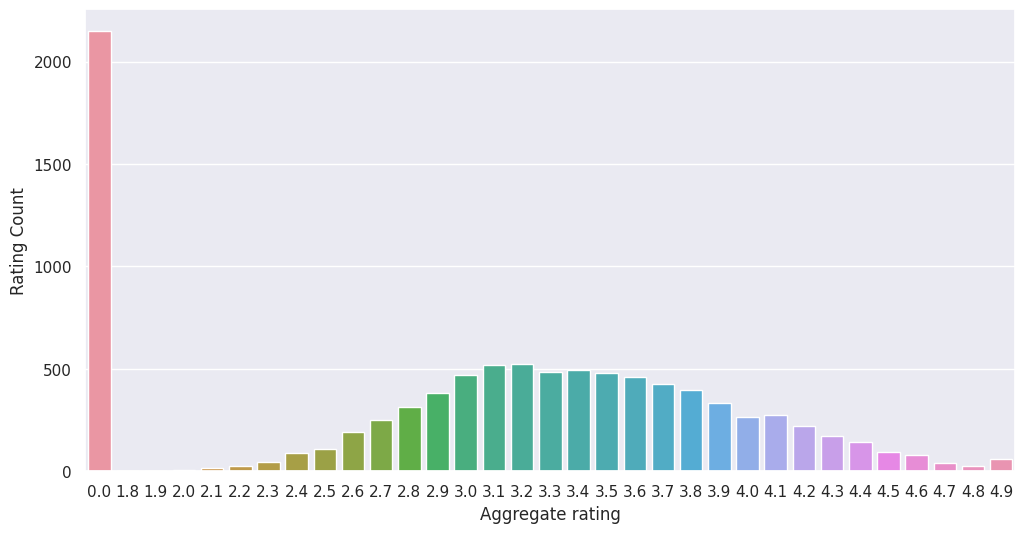

In [ ]:
sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(x='Aggregate rating',y= 'Rating Count',data=rating)

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

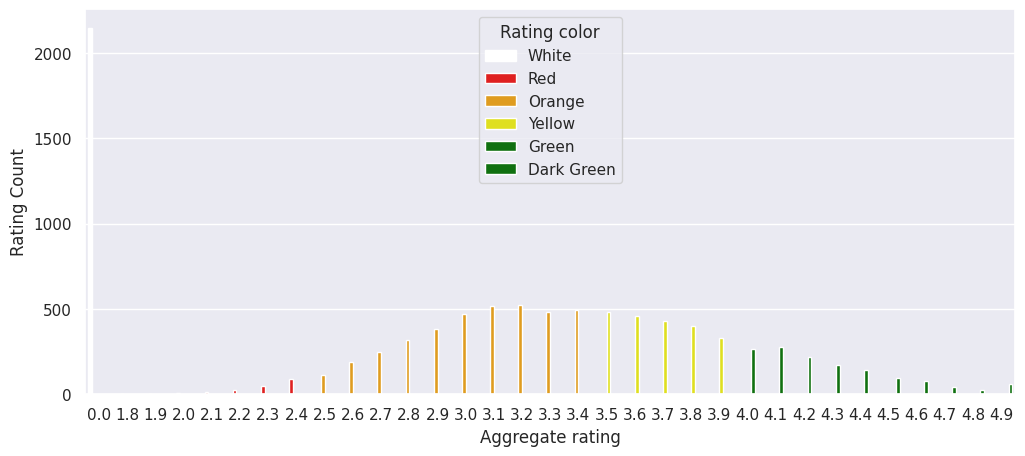

In [ ]:
sns.set(rc={'figure.figsize':(12,5)})
sns.barplot(x='Aggregate rating',y= 'Rating Count',hue='Rating color',data=rating,palette=['white','red','orange','yellow','green','green'])

<Axes: >

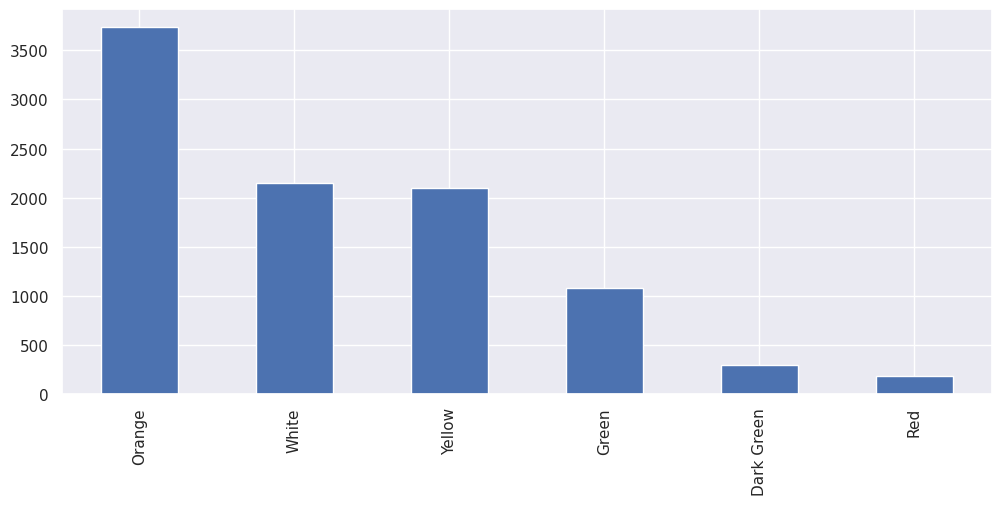

In [ ]:
final['Rating color'].value_counts().plot(kind='bar')

# final.groupby['Rating color']

<Axes: xlabel='Rating color', ylabel='count'>

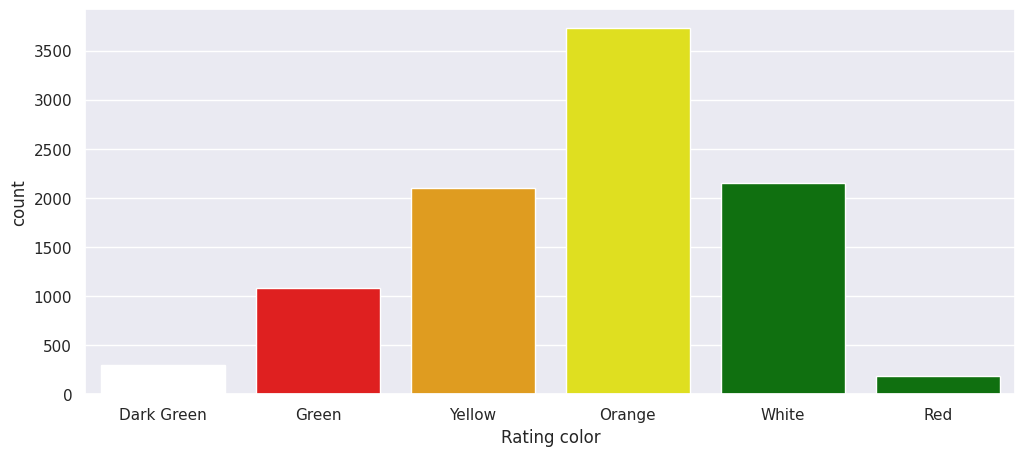

In [ ]:
sns.countplot(data=final.reset_index(),x=final['Rating color'],palette=['white','red','orange','yellow','green','green'])

In [ ]:
#Finding conuntries that have given 0 rating

final[final['Rating color']=='White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [ ]:
final.groupby(['Aggregate rating','Country']).size().reset_index().head(4)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3


In [ ]:
#Find wich currency is used by which country

final[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [ ]:
#Which country has online delivery

final[['Has Table booking','Country']].groupby(['Has Table booking','Country']).size().reset_index()

,Has Table booking,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,7541
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,8
7,No,Qatar,19
8,No,Singapore,20
9,No,South Africa,58


In [ ]:
final[final['Has Table booking']=='Yes'].Country.value_counts()

India             1111
UAE                 18
Phillipines         14
United Kingdom      12
South Africa         2
Qatar                1
Name: Country, dtype: int64

In [ ]:
#Pie chart for cities distribution

city_name=final['City'].value_counts().index
city_name

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad', 'Ahmedabad',
       'Guwahati', 'Amritsar', 'Bhubaneshwar', 'Lucknow',
       ...
       'Mc Millan', 'Mayfield', 'Macedon', 'Mohali', 'Lorn', 'Lincoln',
       'Lakeview', 'Lakes Entrance', 'Inverloch', 'Panchkula'],
      dtype='object', length=140)

In [ ]:
city_name_count=final['City'].value_counts().values
city_name_count

array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   19,   19,   19,   19,   19,   18,
         18,   17,   16,   14,   11,    6,    4,    4,    3,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1])

([<matplotlib.patches.Wedge at 0x7e424970bd60>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

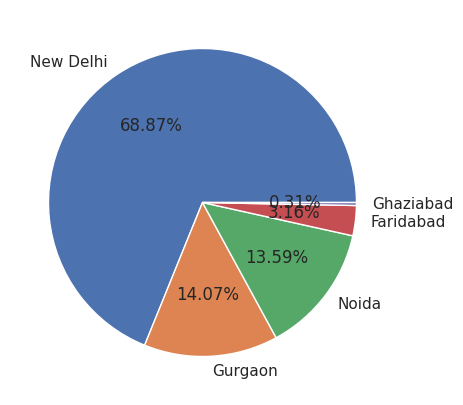

In [ ]:
plt.pie(city_name_count[:5],labels=city_name[:5],autopct='%1.2f%%')